
# Insurance Fraud Detection Using Machine Learning

Rows (Records):  15,420

Columns (Features): 33

>`Target:`FraudFound_P

`Problem Type:` Supervised Learning

`Task:` Binary Classification

`Data Types:` Mostly categorical + few numerical

## Problem statement

The objective is to identify whether a vehicle insurance claim is fraudulent or genuine based on the number of past insurance claims made by the policyholder.

## Explanation of the features of dataset


======================
### Policy Information
======================

PolicyType – Type of insurance policy (e.g., Sedan, Sport, Utility)

BasePolicy – Basic category of the policy

PolicyNumber – Unique identifier for the insurance policy

PolicyBindDate – Date when the policy was issued

PolicyState – State where the policy was registered

PolicyReportFiled – Whether a policy report was filed

==========================
### 🚗 Vehicle Information
==========================

VehicleCategory – Category of vehicle involved

VehiclePrice – Price range of the vehicle

VehicleAge – Age of the vehicle (in years)

Make – Manufacturer of the vehicle

========================
### 💥 Accident Details
========================


AccidentArea – Area of accident (Urban / Rural)

AccidentType – Type of accident

PoliceReportFiled – Whether a police report was filed

WitnessPresent – Presence of witnesses during accident

=======================================
### 👤 Driver / Insured Person Details
=======================================

Sex – Gender of the driver

MaritalStatus – Marital status of the insured

Age – Age of the insured person

Fault – Indicates who was at fault (Policy Holder / Third Party)

DriverRating – Rating of the driver based on driving history

================================
### 💰 Claim & Financial Details
================================

ClaimAmount – Amount claimed for insurance

NumberOfCars – Number of vehicles involved in accident

Days_Policy_Accident – Days between policy start and accident

Days_Policy_Claim – Days between policy start and claim filing

==============================
### 🕒 Time & Location Details
==============================

Month – Month when the accident occurred

WeekOfMonth – Week of the month

DayOfWeek – Day on which the accident occurred

MonthClaimed – Month when the claim was filed

WeekOfMonthClaimed – Week when the claim was filed

DayOfWeekClaimed – Day when claim was filed

==============================
### 🏠 Additional Information
==============================

AddressChange_Claim – Indicates recent address change

NumberOfSuppliments – Number of additional claims

AgeOfVehicle – Age category of vehicle

## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection

## Data

https://www.kaggle.com/datasets/shivamb/vehicle-claim-fraud-detection

In [2]:
df=pd.read_csv(r"C:\Users\Pc\Downloads\fraud_oracle.csv\fraud_oracle.csv")
df

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


## Basic understanding

In [3]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [4]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [5]:
df.tail()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils
15419,Dec,2,Wednesday,Toyota,Urban,Thursday,Dec,3,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision


In [6]:
df.sample()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
4950,Apr,1,Monday,Pontiac,Urban,Monday,Apr,2,Male,Single,...,5 years,26 to 30,No,No,Internal,more than 5,no change,1 vehicle,1994,Liability


In [7]:
df['FraudFound_P'].unique()

array([0, 1], dtype=int64)

In [8]:
df

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


In [9]:
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(15420, 33)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [13]:
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [14]:
df.describe(include=["O"])

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,...,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
count,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,...,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420
unique,12,7,19,2,8,13,2,4,2,9,...,4,8,9,2,2,2,4,5,5,3
top,Jan,Monday,Pontiac,Urban,Monday,Jan,Male,Married,Policy Holder,Sedan - Collision,...,2 to 4,7 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision
freq,1411,2616,3837,13822,3757,1446,13000,10625,11230,5584,...,5485,5807,5593,14992,15333,15179,7047,14324,14316,5962


## Visualization

In [15]:
from typing import List

def display_cols_value_counts(col_names: List[str]):
    for col_name in col_names:
        print('_'*30)
        print(f"column: {col_name}")              # column name subtitles
        print('-'*30)
        print("The datatype:", df[col_name].dtypes)
        print("The number of null values:", df[col_name].isnull().sum())
        print(df[col_name].describe())
        print(" ")
        
        
        # check if the unique value in the column are less then 10 to diaplay frequency
        
        if df[col_name].nunique() < 10:
            print("There are ",df[col_name].nunique(), "unirue values.")
            print("The freaquency  table:")
            print(df[col_name].value_counts())
        else:
            print("(Frequency table not displayed , there are" ,df[col_name].nunique(),"unique values")
        print('')
        
        
display_cols_value_counts(df.columns) 

______________________________
column: Month
------------------------------
The datatype: object
The number of null values: 0
count     15420
unique       12
top         Jan
freq       1411
Name: Month, dtype: object
 
(Frequency table not displayed , there are 12 unique values

______________________________
column: WeekOfMonth
------------------------------
The datatype: int64
The number of null values: 0
count    15420.000000
mean         2.788586
std          1.287585
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: WeekOfMonth, dtype: float64
 
There are  5 unirue values.
The freaquency  table:
WeekOfMonth
3    3640
2    3558
4    3398
1    3187
5    1637
Name: count, dtype: int64

______________________________
column: DayOfWeek
------------------------------
The datatype: object
The number of null values: 0
count      15420
unique         7
top       Monday
freq        2616
Name: DayOfWeek, dtype: object
 
There 

In [16]:
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:")
print(categorical_cols)


Categorical Columns:
Index(['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed',
       'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
       'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
       'BasePolicy'],
      dtype='object')


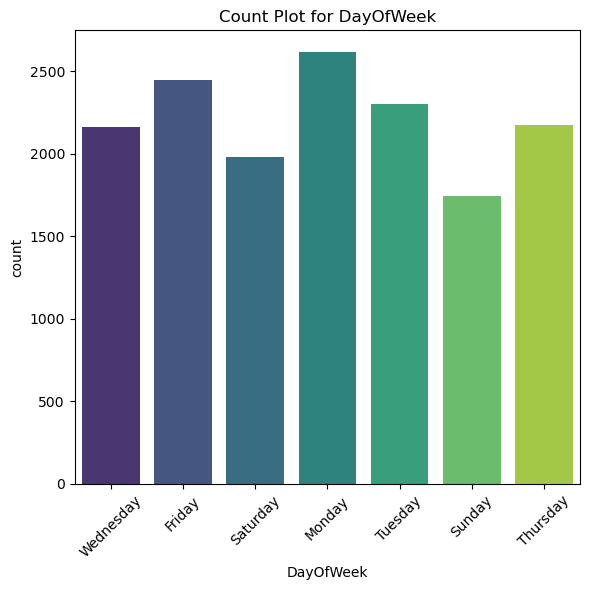

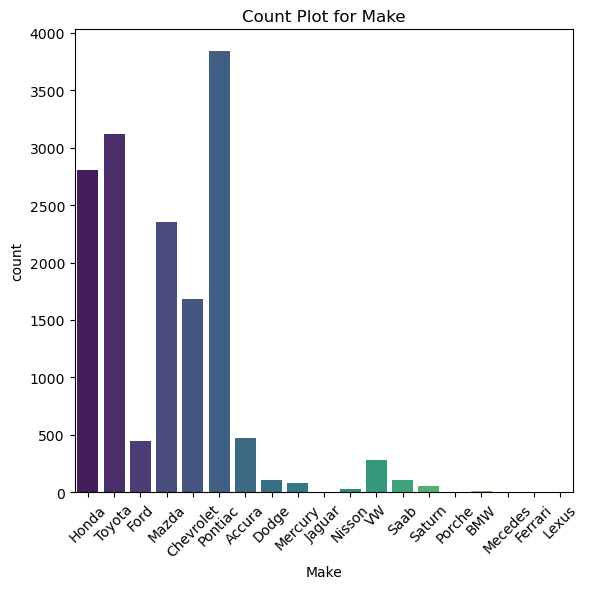

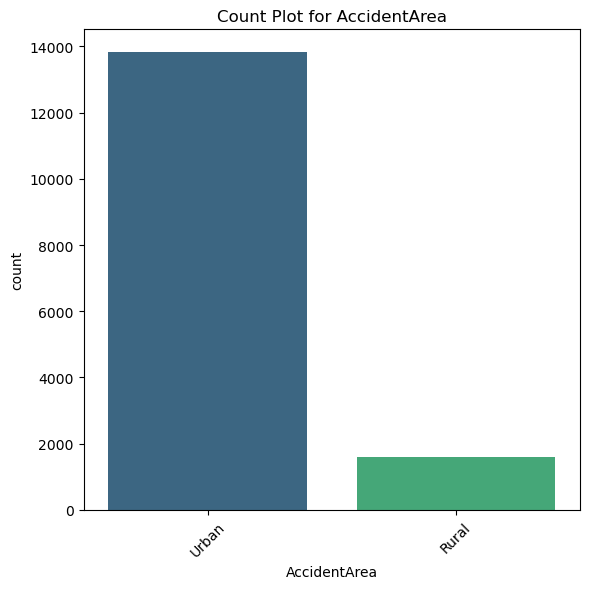

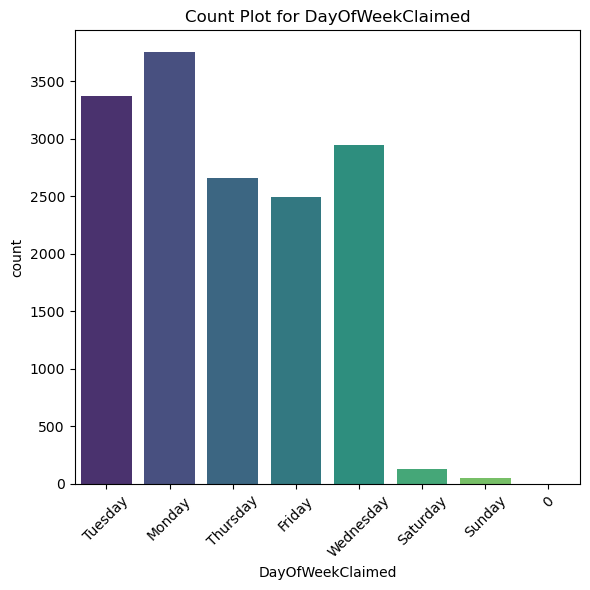

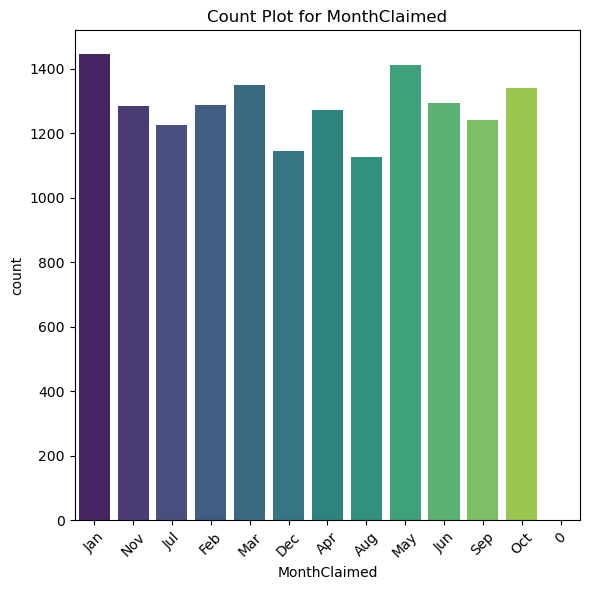

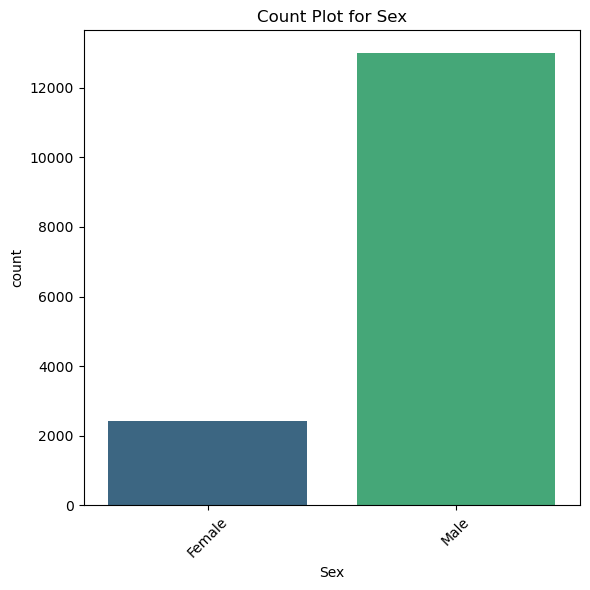

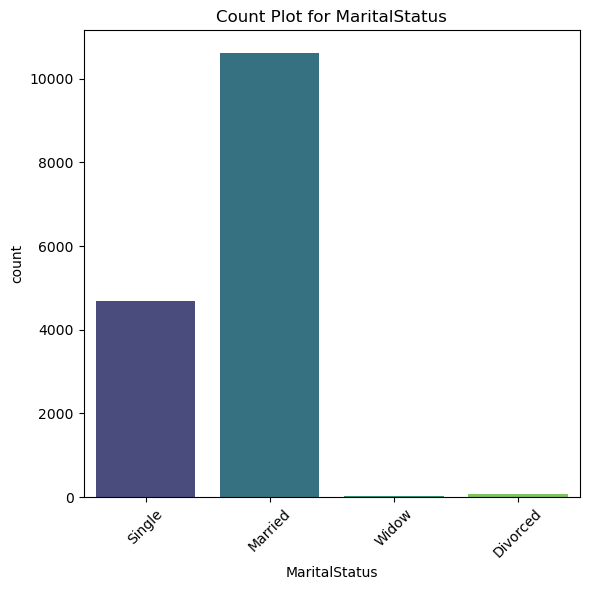

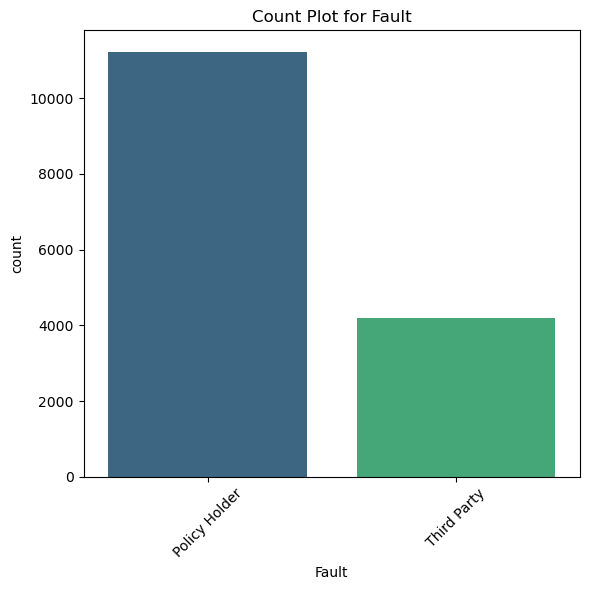

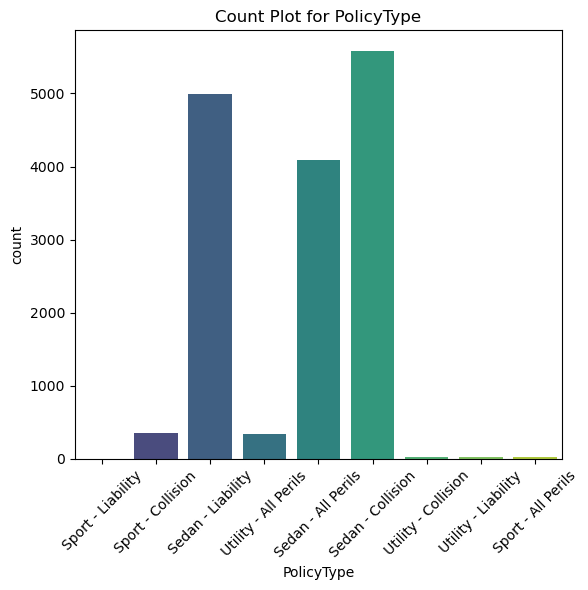

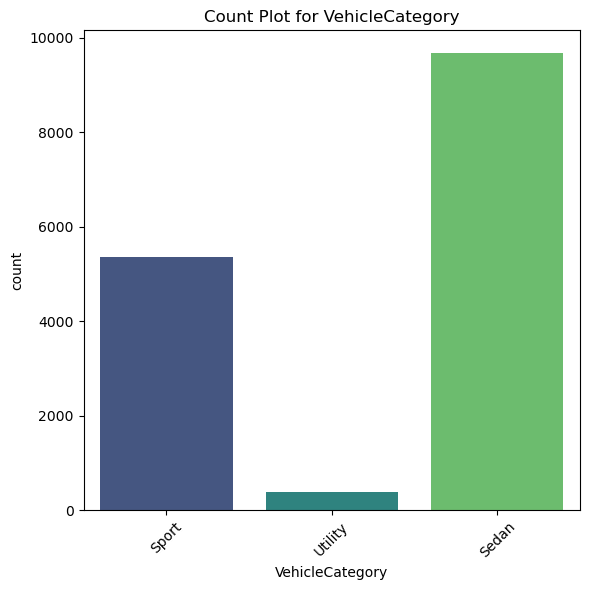

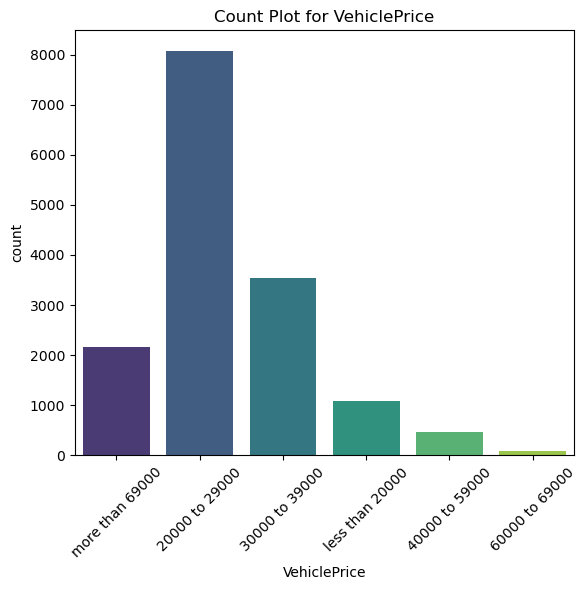

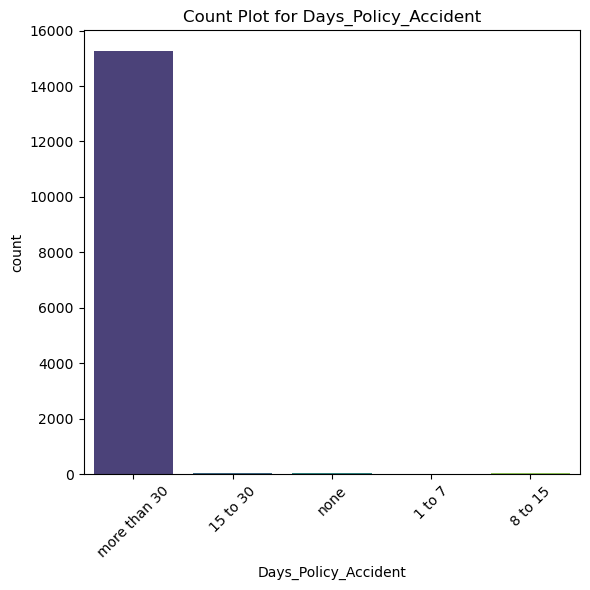

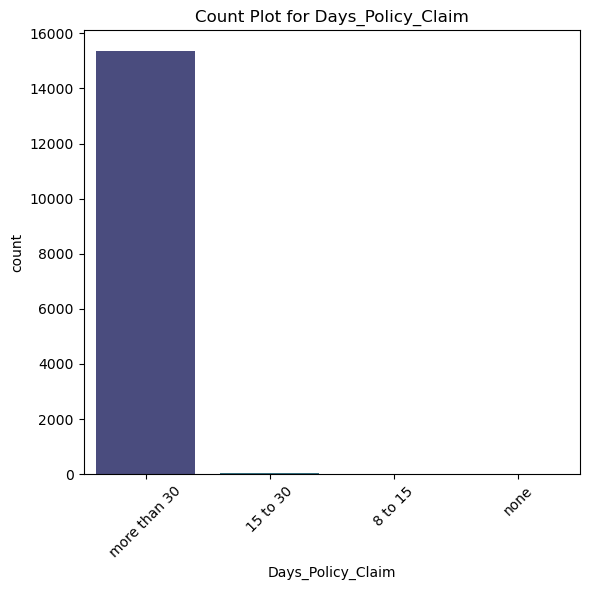

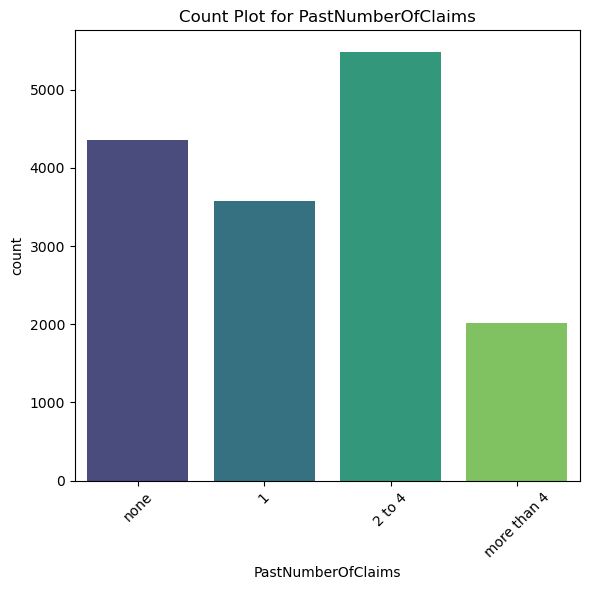

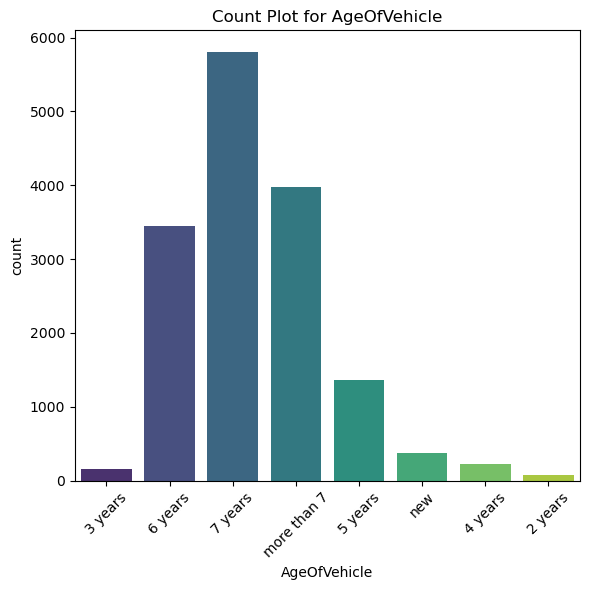

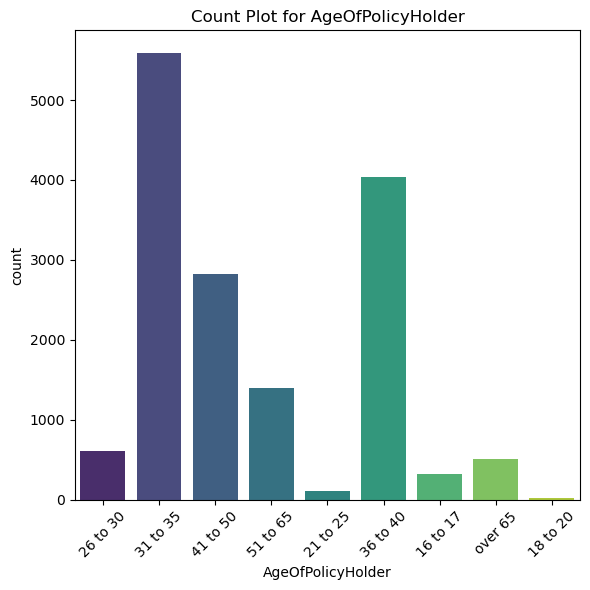

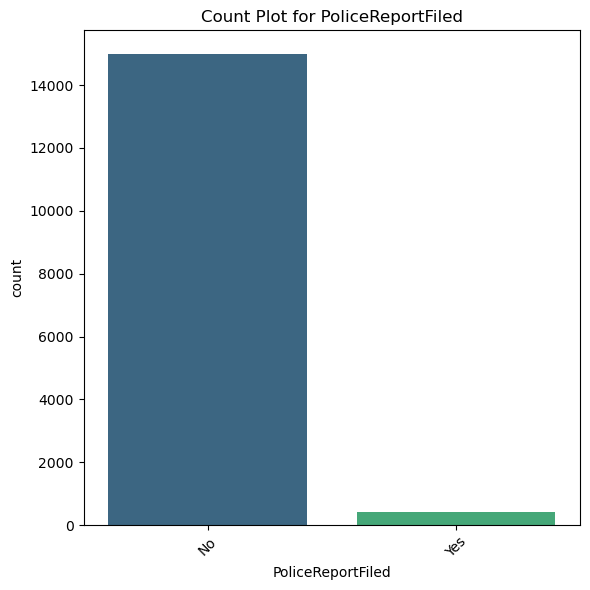

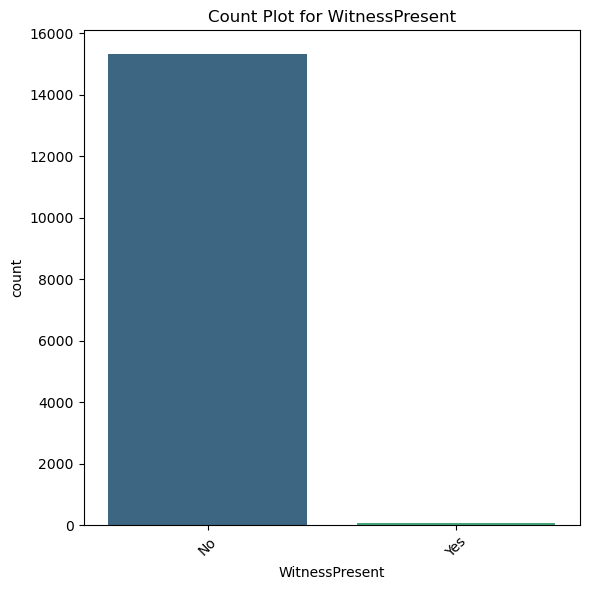

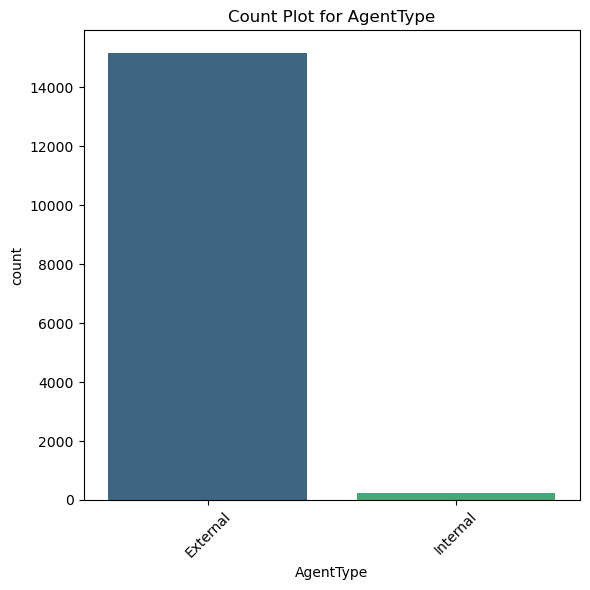

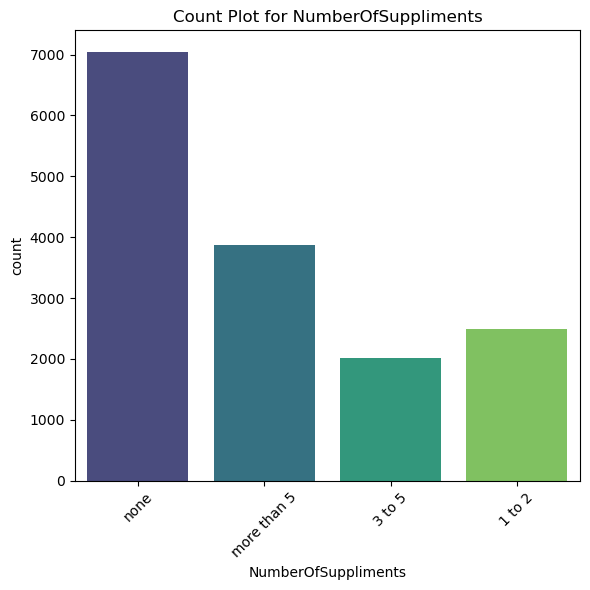

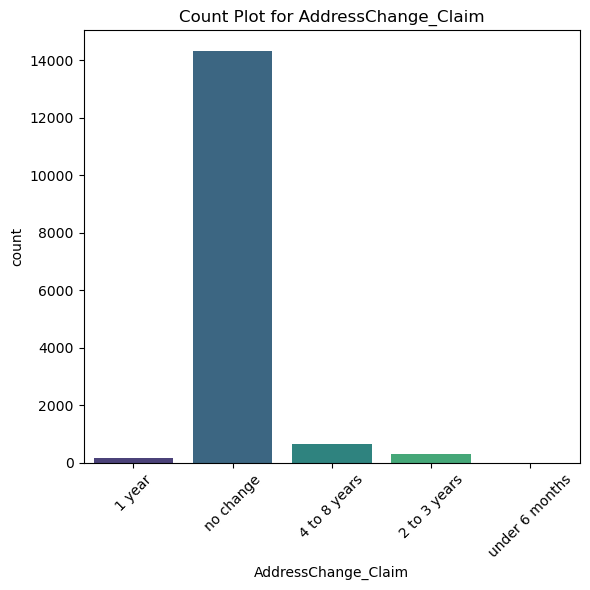

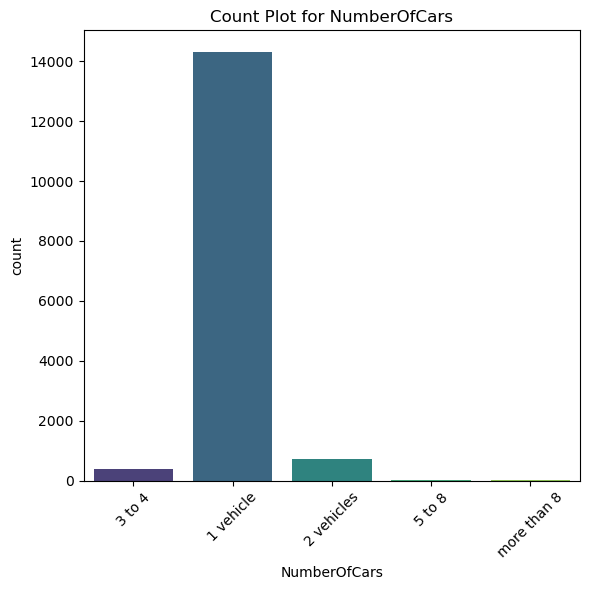

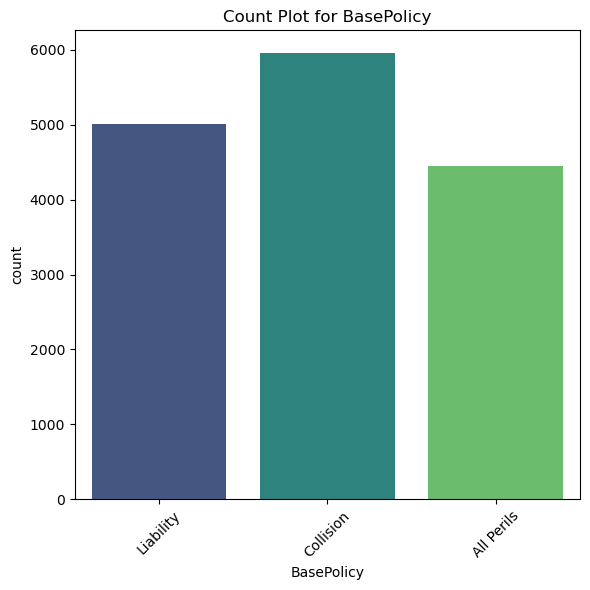

In [17]:
# Select categorical columns
categorical_columns = df.select_dtypes(include=("object")).columns.tolist()

# Loop through categorical columns (skip first column if needed)
for col in categorical_columns[1:]:
    plt.figure(figsize=(6, 6))   #  plt.Figure →  plt.figure
    sns.countplot(data=df, x=col, hue=col, palette="viridis")
    plt.title(f"Count Plot for {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

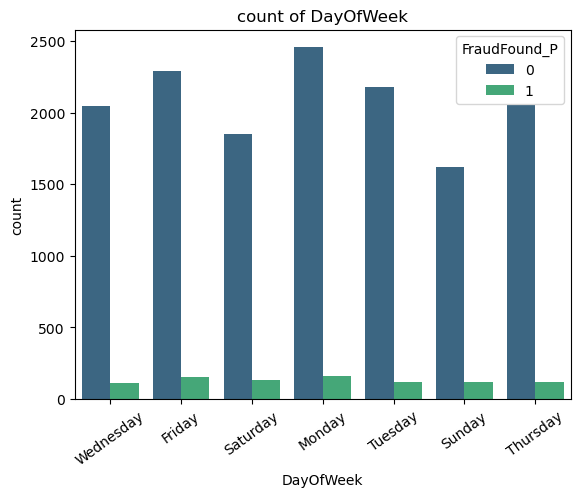

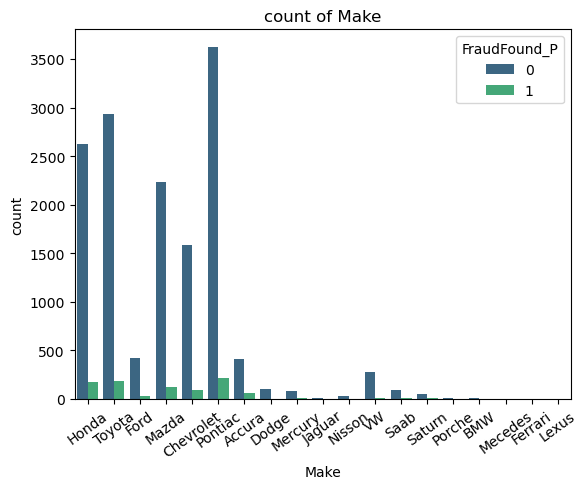

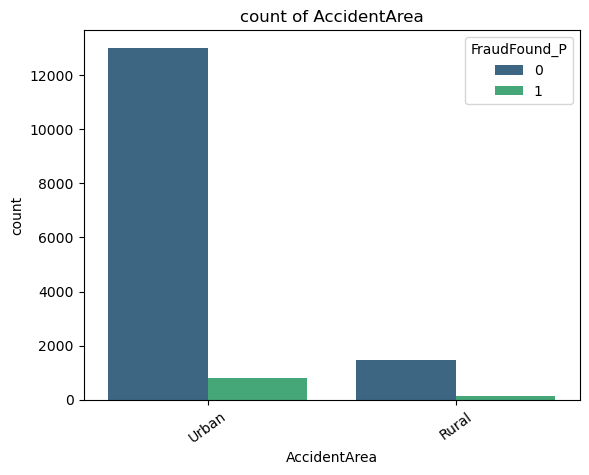

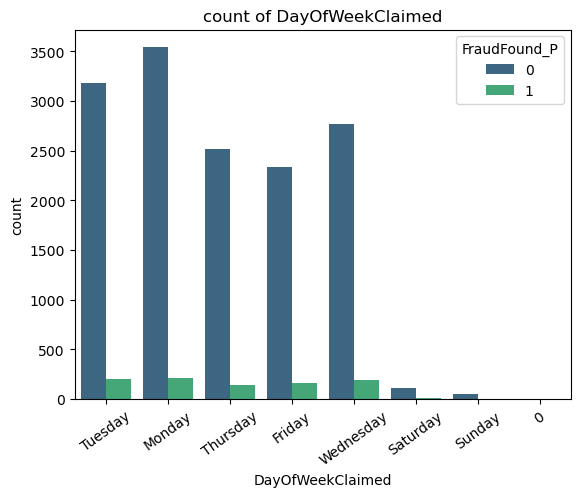

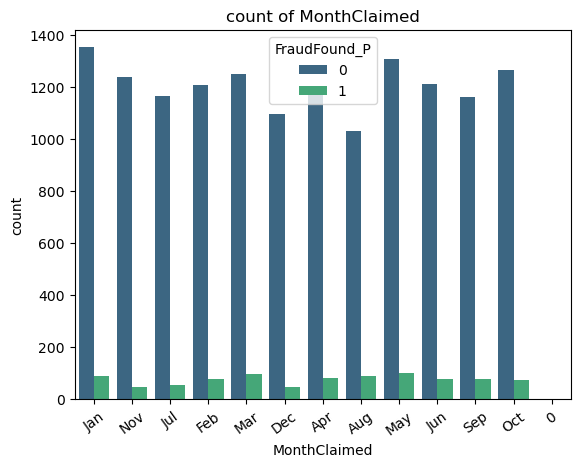

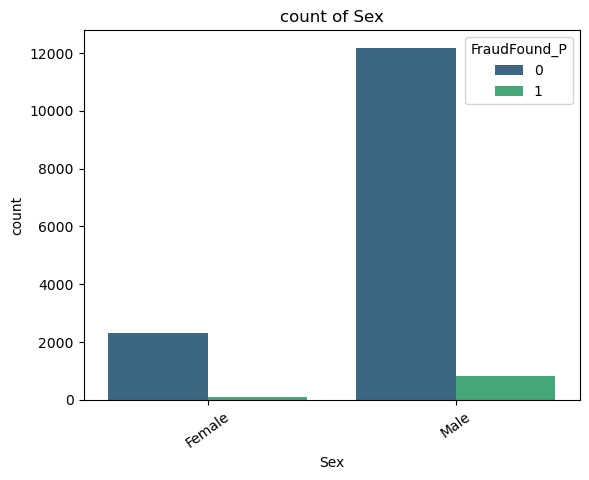

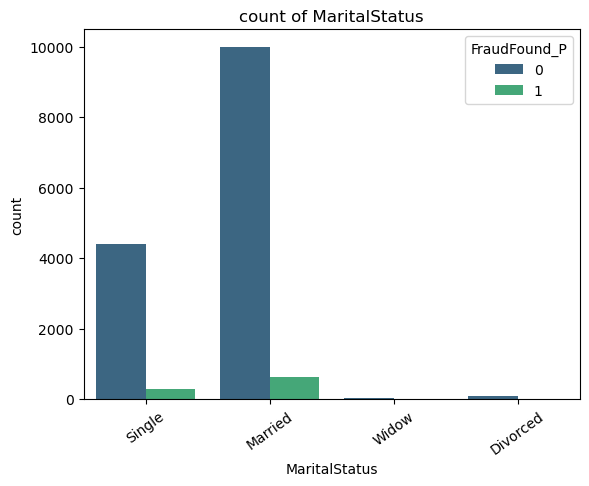

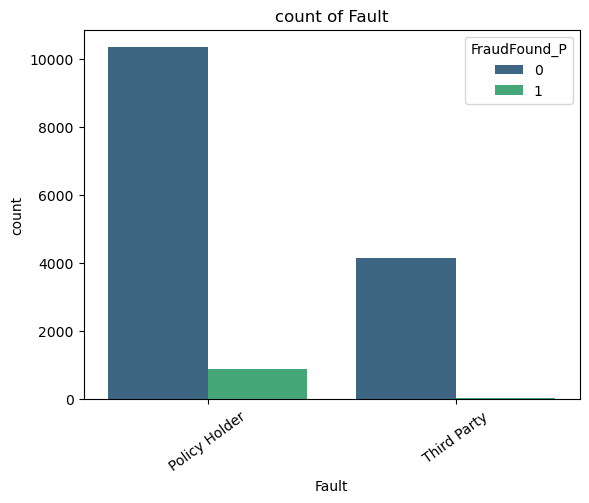

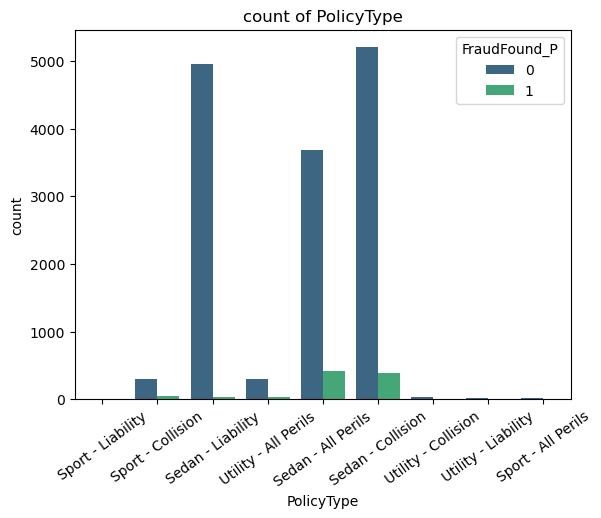

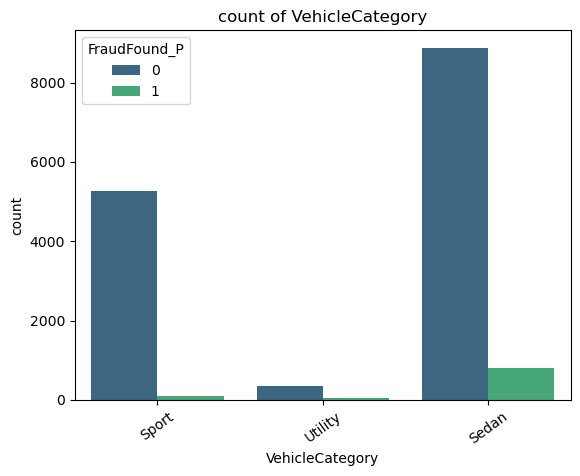

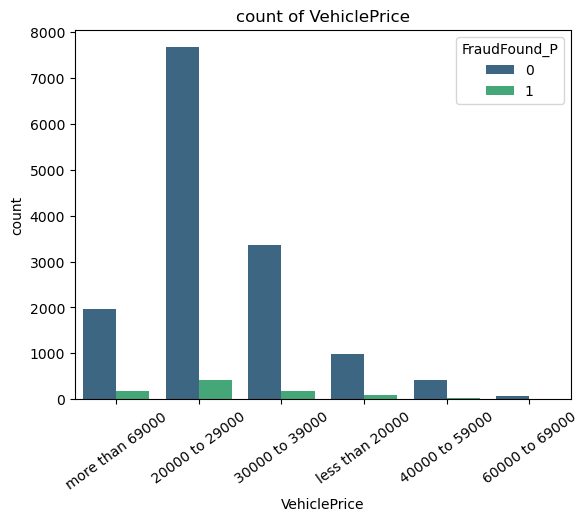

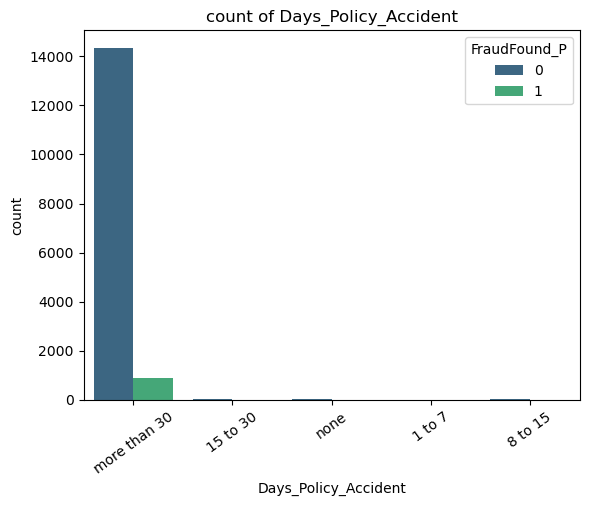

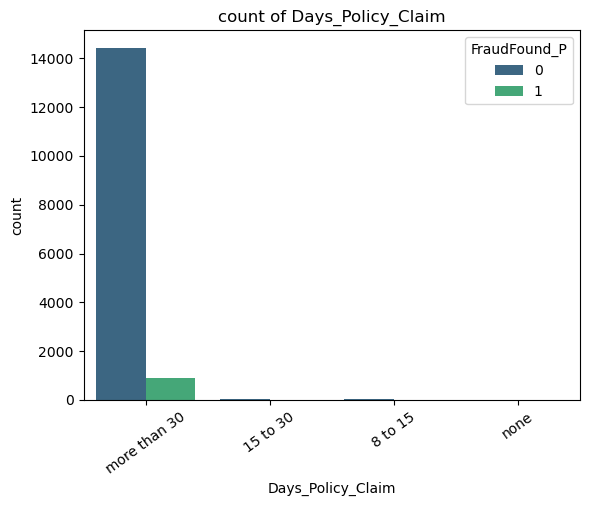

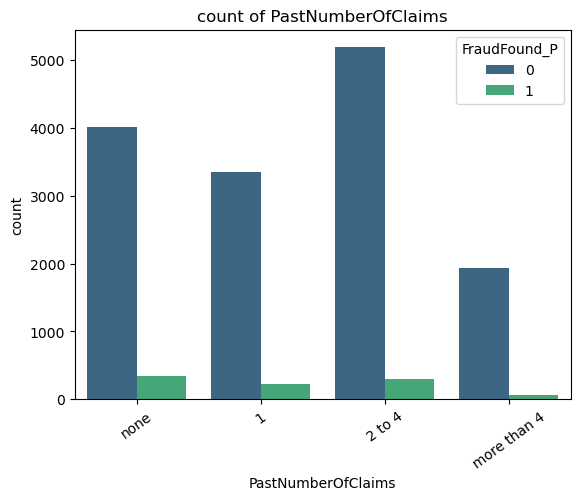

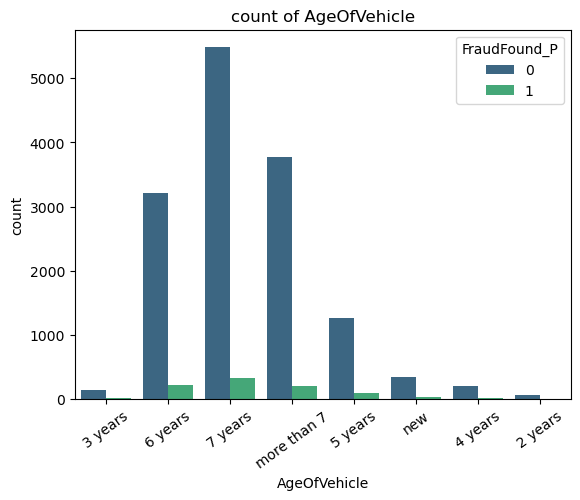

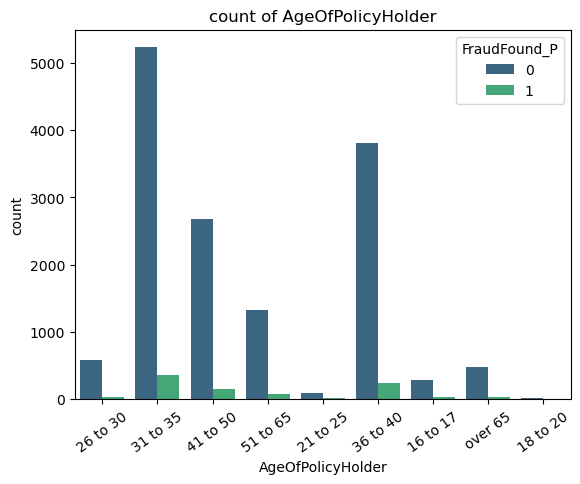

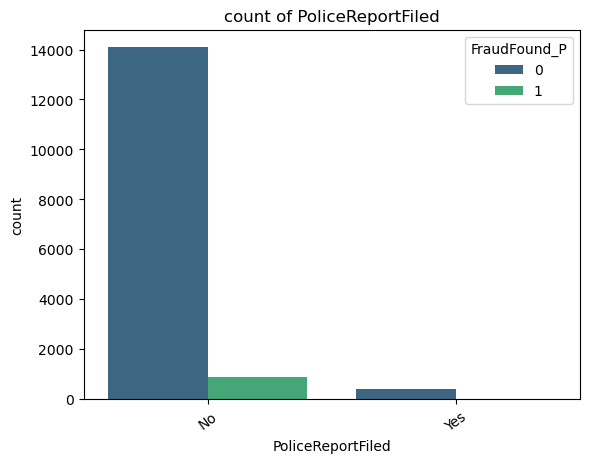

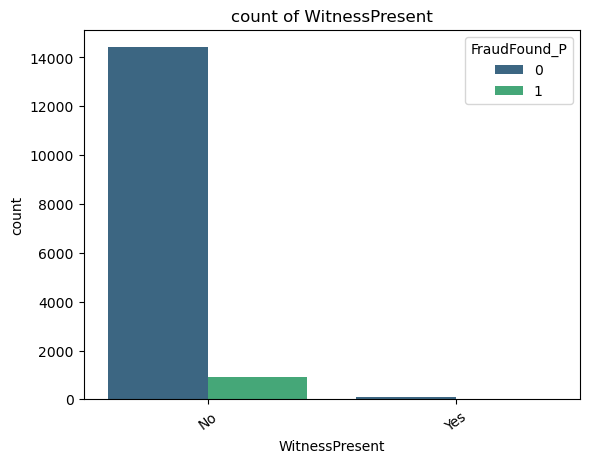

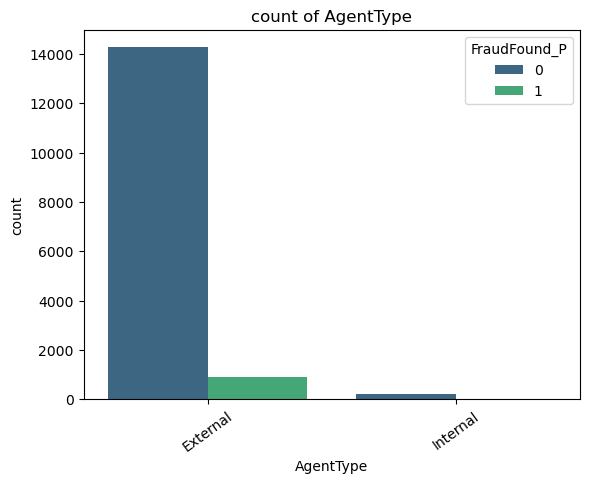

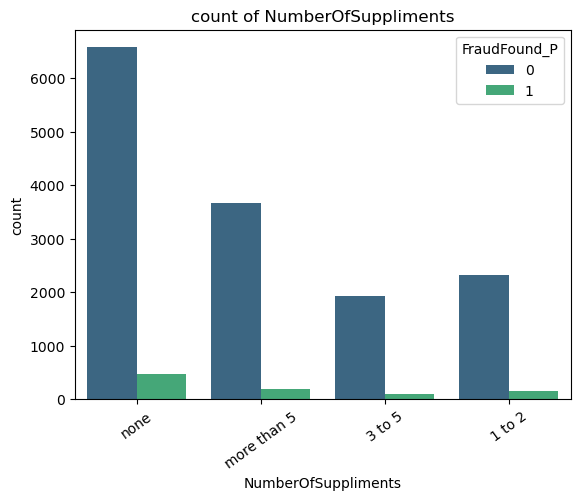

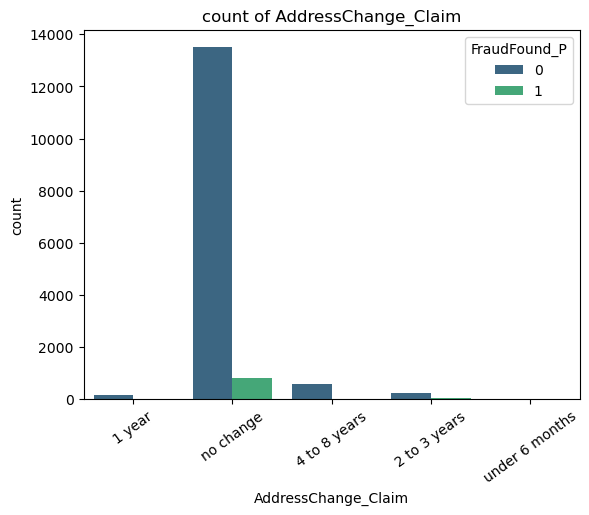

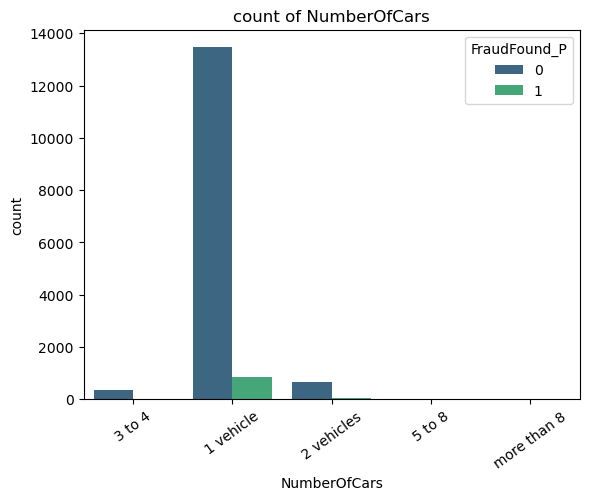

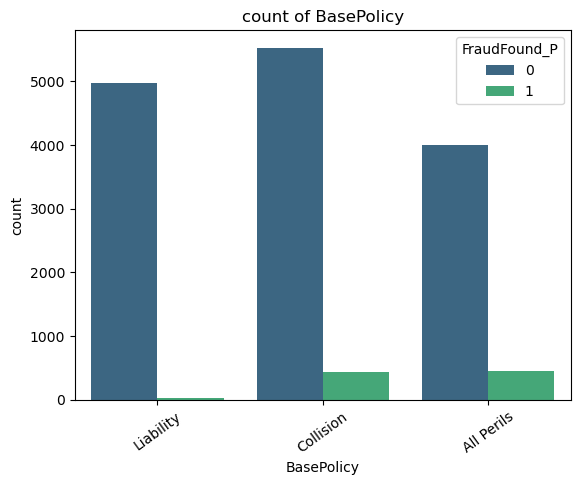

In [18]:
for col in categorical_columns[1:]: # skip the first feature
    plt.Figure(figsize=(8,4))
    sns.countplot(data=df, x=col , hue="FraudFound_P" , palette="viridis")
    plt.title(f"count of {col}")
    plt.xlabel(col)
    plt.ylabel("count")
    plt.xticks(rotation=36)
    plt.show()

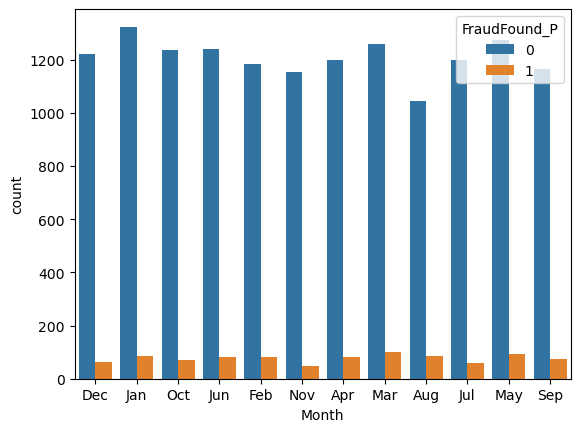

In [19]:
sns.countplot(x="Month",hue="FraudFound_P", data=df)
plt.show()

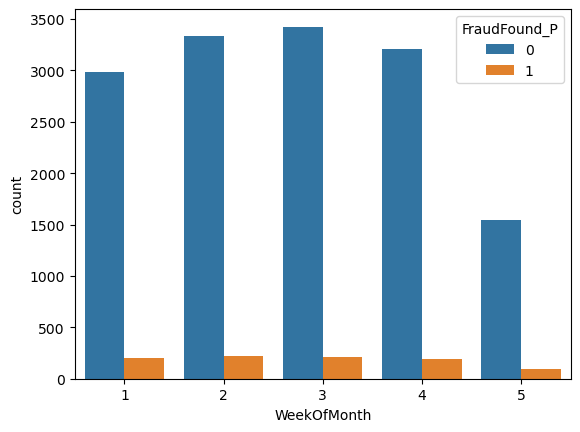

In [20]:
sns.countplot(x="WeekOfMonth",hue="FraudFound_P", data=df)
plt.show()

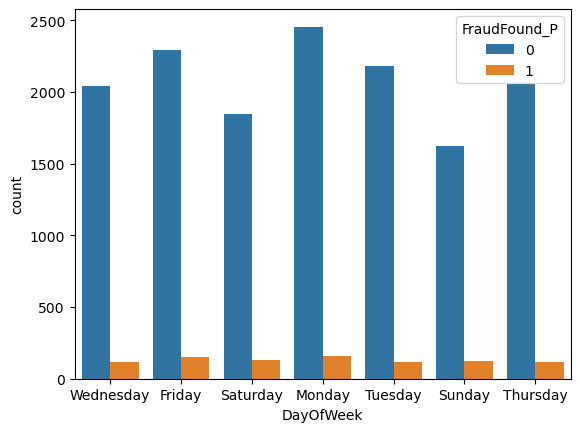

In [21]:
sns.countplot(x="DayOfWeek",hue="FraudFound_P", data=df)
plt.show()

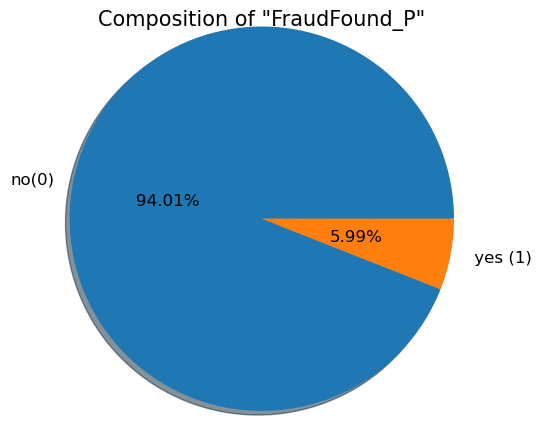

In [22]:
counts = df['FraudFound_P'].value_counts()

plt.pie(
    x=counts.values,
    labels=['no(0)', ' yes (1)'],
    autopct='%2.2f%%',
    pctdistance=0.5,
    shadow=True,
    radius=1.3,
    textprops={'fontsize':12}
)

plt.title('Composition of "FraudFound_P"', fontsize=15)
plt.show()


## Data Cleaning

In [23]:
df.duplicated().sum()

0

In [24]:
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [25]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [26]:
df['DayOfWeekClaimed'].value_counts()

DayOfWeekClaimed
Monday       3757
Tuesday      3375
Wednesday    2951
Thursday     2660
Friday       2497
Saturday      127
Sunday         52
0               1
Name: count, dtype: int64

In [27]:
df['MonthClaimed'].value_counts()

MonthClaimed
Jan    1446
May    1411
Mar    1348
Oct    1339
Jun    1293
Feb    1287
Nov    1285
Apr    1271
Sep    1242
Jul    1225
Dec    1146
Aug    1126
0         1
Name: count, dtype: int64

In [28]:

df['NumberOfSuppliments'].value_counts()

NumberOfSuppliments
none           7047
more than 5    3867
1 to 2         2489
3 to 5         2017
Name: count, dtype: int64

In [29]:
df['NumberOfSuppliments'].value_counts(normalize=True) * 100


NumberOfSuppliments
none           45.700389
more than 5    25.077821
1 to 2         16.141375
3 to 5         13.080415
Name: proportion, dtype: float64

In [30]:
df.drop(columns='NumberOfSuppliments',inplace=True)

In [31]:
df=df[df["DayOfWeekClaimed"]!="0"]
df=df[df["MonthClaimed"]!="0"]

In [32]:
df["RepNumber"].nunique()

16

In [33]:
df['RepNumber'].value_counts()

RepNumber
7     1069
9      999
1      987
5      987
10     986
12     977
15     976
16     967
2      956
3      949
11     948
6      942
14     941
8      931
4      912
13     892
Name: count, dtype: int64

In [34]:
df.drop(columns='RepNumber',inplace=True)

<Axes: >

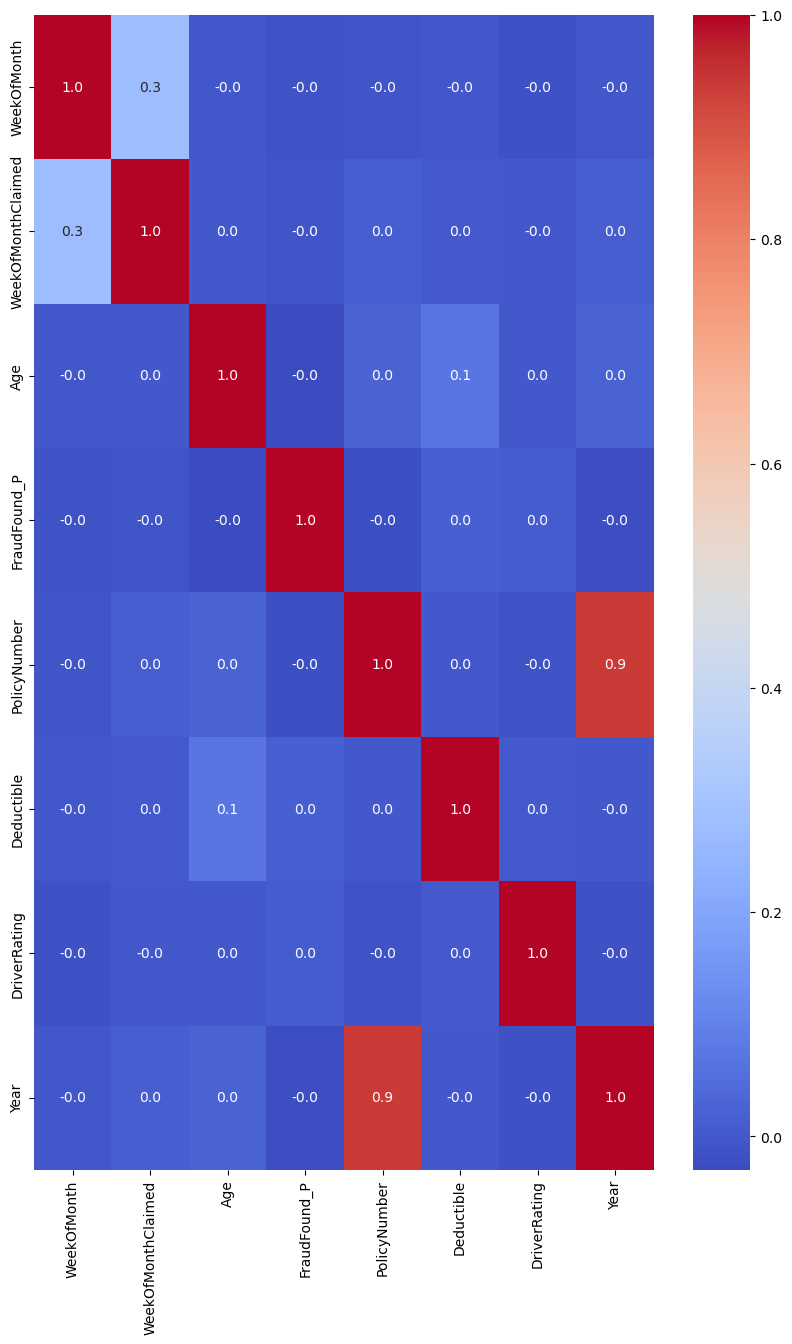

In [35]:
plt.figure(figsize=(10,15))
df.corr(numeric_only=True)
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt="0.01f")

In [36]:
df.corr(numeric_only=True)["FraudFound_P"].sort_values(ascending=False) 

FraudFound_P          1.000000
Deductible            0.017345
DriverRating          0.007259
WeekOfMonthClaimed   -0.005783
WeekOfMonth          -0.011872
PolicyNumber         -0.020369
Year                 -0.024778
Age                  -0.029798
Name: FraudFound_P, dtype: float64

In [37]:
df.drop(columns="PolicyNumber",inplace=True)

## Data Transformation

Text(0.5, 1.0, 'age-Histogram')

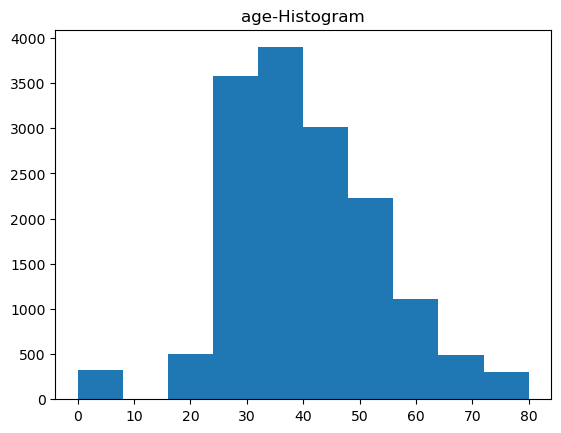

In [38]:
plt.hist(df["Age"])
plt.title("age-Histogram")

In [39]:
df=df[df["Age"]>=18]

Text(0.5, 1.0, 'age-Histogram')

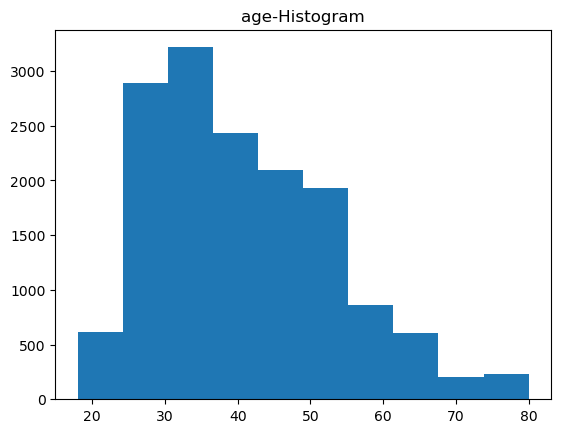

In [40]:
plt.hist(df["Age"])
plt.title("age-Histogram")

In [44]:
# calculate skewness for each column

skewness = df.skew(numeric_only=True)

# sort the skewness values in ascending order

sorted_skewness = skewness.sort_values(ascending=True)

# Display the sorted skewness values

print(sorted_skewness)

DriverRating          0.009843
WeekOfMonth           0.113097
WeekOfMonthClaimed    0.157252
Year                  0.239207
Age                   0.723733
FraudFound_P          3.743651
Deductible            6.011150
dtype: float64


In [45]:
df["Deductible"].value_counts()

Deductible
400    14504
700      311
500      263
300        7
Name: count, dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15085 entries, 0 to 15419
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15085 non-null  object
 1   WeekOfMonth           15085 non-null  int64 
 2   DayOfWeek             15085 non-null  object
 3   Make                  15085 non-null  object
 4   AccidentArea          15085 non-null  object
 5   DayOfWeekClaimed      15085 non-null  object
 6   MonthClaimed          15085 non-null  object
 7   WeekOfMonthClaimed    15085 non-null  int64 
 8   Sex                   15085 non-null  object
 9   MaritalStatus         15085 non-null  object
 10  Age                   15085 non-null  int64 
 11  Fault                 15085 non-null  object
 12  PolicyType            15085 non-null  object
 13  VehicleCategory       15085 non-null  object
 14  VehiclePrice          15085 non-null  object
 15  FraudFound_P          15085 non-null  int

## Outlier Handlig


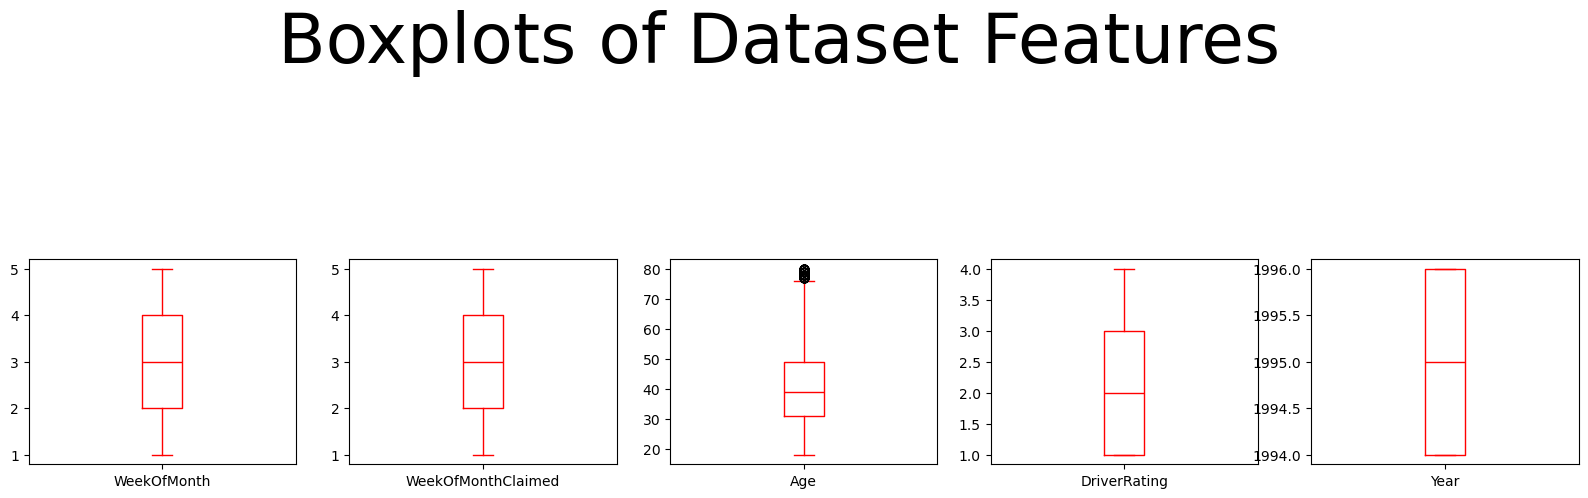

In [47]:
out=["WeekOfMonth","WeekOfMonthClaimed","Age","DriverRating","Year"]
df[out].plot(kind="box",subplots=True,layout=(8,5),figsize=(20,25),color="red")
plt.suptitle("Boxplots of Dataset Features",fontsize=50)
plt.show()

In [48]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['Age'] = df['Age'].clip(lower=lower_bound, upper=upper_bound)

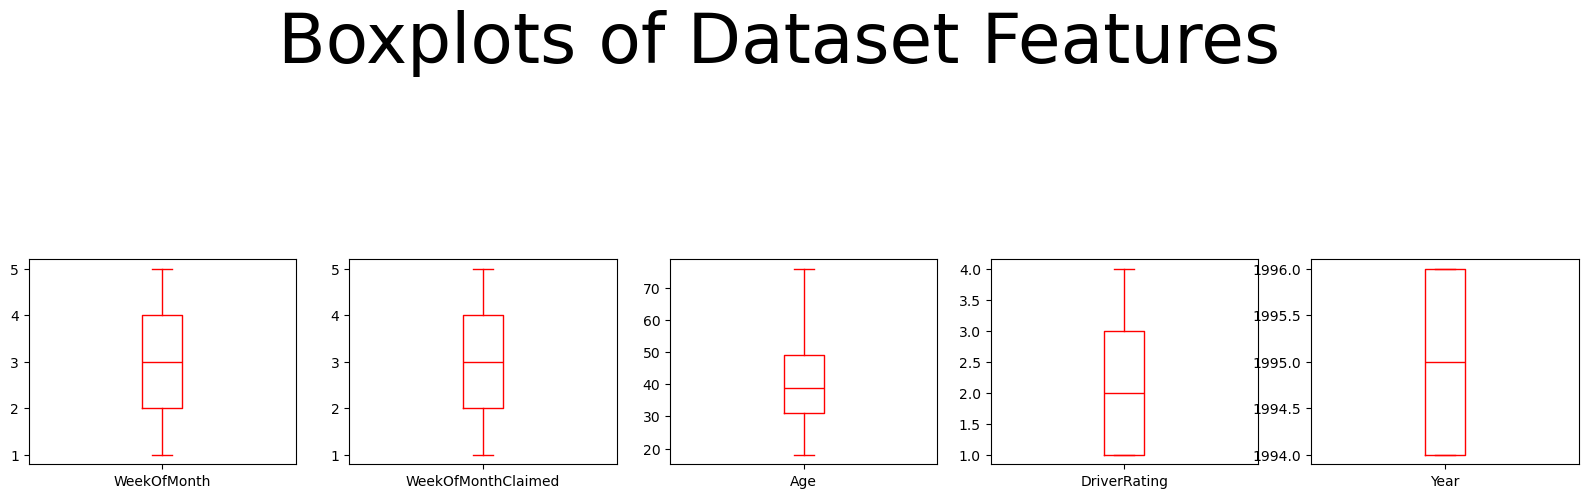

In [49]:
out=["WeekOfMonth","WeekOfMonthClaimed","Age","DriverRating","Year"]
df[out].plot(kind="box",subplots=True,layout=(8,5),figsize=(20,25),color="red")
plt.suptitle("Boxplots of Dataset Features",fontsize=50)
plt.show()

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15085 entries, 0 to 15419
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15085 non-null  object
 1   WeekOfMonth           15085 non-null  int64 
 2   DayOfWeek             15085 non-null  object
 3   Make                  15085 non-null  object
 4   AccidentArea          15085 non-null  object
 5   DayOfWeekClaimed      15085 non-null  object
 6   MonthClaimed          15085 non-null  object
 7   WeekOfMonthClaimed    15085 non-null  int64 
 8   Sex                   15085 non-null  object
 9   MaritalStatus         15085 non-null  object
 10  Age                   15085 non-null  int64 
 11  Fault                 15085 non-null  object
 12  PolicyType            15085 non-null  object
 13  VehicleCategory       15085 non-null  object
 14  VehiclePrice          15085 non-null  object
 15  FraudFound_P          15085 non-null  int

In [51]:
df.skew(numeric_only=True)

WeekOfMonth           0.113097
WeekOfMonthClaimed    0.157252
Age                   0.696381
FraudFound_P          3.743651
Deductible            6.011150
DriverRating          0.009843
Year                  0.239207
dtype: float64

## Encoding

In [52]:
cat=df.select_dtypes(include="object")
cat

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,...,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,AddressChange_Claim,NumberOfCars,BasePolicy
0,Dec,Wednesday,Honda,Urban,Tuesday,Jan,Female,Single,Policy Holder,Sport - Liability,...,more than 30,none,3 years,26 to 30,No,No,External,1 year,3 to 4,Liability
1,Jan,Wednesday,Honda,Urban,Monday,Jan,Male,Single,Policy Holder,Sport - Collision,...,more than 30,none,6 years,31 to 35,Yes,No,External,no change,1 vehicle,Collision
2,Oct,Friday,Honda,Urban,Thursday,Nov,Male,Married,Policy Holder,Sport - Collision,...,more than 30,1,7 years,41 to 50,No,No,External,no change,1 vehicle,Collision
3,Jun,Saturday,Toyota,Rural,Friday,Jul,Male,Married,Third Party,Sedan - Liability,...,more than 30,1,more than 7,51 to 65,Yes,No,External,no change,1 vehicle,Liability
4,Jan,Monday,Honda,Urban,Tuesday,Feb,Female,Single,Third Party,Sport - Collision,...,more than 30,none,5 years,31 to 35,No,No,External,no change,1 vehicle,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,Friday,Toyota,Urban,Tuesday,Nov,Male,Married,Policy Holder,Sedan - Collision,...,more than 30,2 to 4,6 years,31 to 35,No,No,External,no change,1 vehicle,Collision
15416,Nov,Thursday,Pontiac,Urban,Friday,Dec,Male,Married,Policy Holder,Sedan - Liability,...,more than 30,more than 4,6 years,31 to 35,No,No,External,no change,3 to 4,Liability
15417,Nov,Thursday,Toyota,Rural,Friday,Dec,Male,Single,Policy Holder,Sedan - Collision,...,more than 30,more than 4,5 years,26 to 30,No,No,External,no change,1 vehicle,Collision
15418,Dec,Monday,Toyota,Urban,Thursday,Dec,Female,Married,Third Party,Sedan - All Perils,...,more than 30,none,2 years,31 to 35,No,No,External,no change,1 vehicle,All Perils


In [53]:

print(df["Sex"].unique())
print(df["PoliceReportFiled"].unique())
print(df["WitnessPresent"].unique())
print(df["Month"].unique())
print(df["DayOfWeek"].unique())
print(df["DayOfWeekClaimed"].unique())
print(df["MonthClaimed"].unique())
print(df["AgeOfVehicle"].unique())
print(df["AgeOfPolicyHolder"].unique())
print(df["AddressChange_Claim"].unique())
print(df["NumberOfCars"].unique())


['Female' 'Male']
['No' 'Yes']
['No' 'Yes']
['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Apr' 'Mar' 'Aug' 'Jul' 'May' 'Sep' 'Nov']
['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday']
['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday']
['Jan' 'Nov' 'Jul' 'Feb' 'Dec' 'Apr' 'Mar' 'Aug' 'May' 'Jun' 'Sep' 'Oct']
['3 years' '6 years' '7 years' 'more than 7' '5 years' '4 years' '2 years'
 'new']
['26 to 30' '31 to 35' '41 to 50' '51 to 65' '21 to 25' '36 to 40'
 'over 65']
['1 year' 'no change' '4 to 8 years' '2 to 3 years' 'under 6 months']
['3 to 4' '1 vehicle' '2 vehicles' '5 to 8' 'more than 8']


In [54]:
print(df["DayOfWeekClaimed"].value_counts())
print(df["MonthClaimed"].value_counts())
# print(df["NumberOfSuppliments"].value_counts())

DayOfWeekClaimed
Monday       3683
Tuesday      3294
Wednesday    2887
Thursday     2611
Friday       2432
Saturday      126
Sunday         52
Name: count, dtype: int64
MonthClaimed
May    1376
Jan    1373
Oct    1335
Mar    1298
Nov    1274
Jun    1268
Feb    1238
Sep    1236
Jul    1216
Apr    1216
Dec    1138
Aug    1117
Name: count, dtype: int64


In [55]:
print(df["DayOfWeekClaimed"].unique())
print(df["MonthClaimed"].unique())
# print(df["NumberOfSuppliments"].unique())

['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday']
['Jan' 'Nov' 'Jul' 'Feb' 'Dec' 'Apr' 'Mar' 'Aug' 'May' 'Jun' 'Sep' 'Oct']


In [56]:
df["DayOfWeek"].value_counts()

DayOfWeek
Monday       2544
Friday       2389
Tuesday      2257
Thursday     2134
Wednesday    2107
Saturday     1944
Sunday       1710
Name: count, dtype: int64

In [58]:

# Manual / Ordinal Encoding using map()

df['Sex'] = df['Sex'].map({'Male': 0,'Female': 1})

df['PoliceReportFiled'] = df['PoliceReportFiled'].map({ 'Yes': 0,'No': 1})

df['WitnessPresent'] = df['WitnessPresent'].map({ 'No': 0,'Yes': 1})

df["Month"] = df["Month"].map({"Jan":0,"Feb":1,"Mar":2,"Apr":3,"May":4,"Jun":5,"Jul":6,"Aug":7,"Sep":8,"Oct":9,"Nov":10,"Dec":11})
df["Month"].unique()

df['DayOfWeek'] = df['DayOfWeek'].map({'Monday': 0,'Tuesday': 1,'Wednesday':2,'Thursday':3,'Friday':4,'Saturday':5,'Sunday':6 })
df["DayOfWeek"].unique()

df['DayOfWeekClaimed'] = df['DayOfWeekClaimed'].map({'Monday': 0,'Tuesday': 1,'Wednesday':2,'Thursday':3,'Friday':4,'Saturday':5,'Sunday':6 })
df["DayOfWeekClaimed"].unique()

df["MonthClaimed"] = df["MonthClaimed"].map({"Jan":0,"Feb":1,"Mar":2,"Apr":3,"May":4,"Jun":5,"Jul":6,"Aug":7,"Sep":8,"Oct":9,"Nov":10,"Dec":11})
df["MonthClaimed"].unique()

df['AgeOfVehicle'] = df['AgeOfVehicle'].map({'7 years':0,'more than 7':1,'6 years':2,'5 years':3,'new':4,'4 years':5,'3 years':6,'2 years':7})
df["AgeOfVehicle"].unique()

df['AgeOfPolicyHolder'] = df['AgeOfPolicyHolder'].map({'21 to 25':0,'26 to 30':1,'31 to 35':2,'36 to 40':3,'41 to 50':4,'51 to 65':5,'over 65':6})
df["AgeOfPolicyHolder"].unique()

df['AddressChange_Claim'] = df['AddressChange_Claim'].map({'no change':0,'1 year':1,'2 to 3 years':2,'4 to 8 years':3,'under 6 months':4})
df["AddressChange_Claim"].unique()

df['NumberOfCars'] = df['NumberOfCars'].map({'1 vehicle':0,'2 vehicles':1,'3 to 4':2,'5 to 8':3,'more than 8':4})
df["NumberOfCars"].unique()


array([2, 0, 1, 3, 4], dtype=int64)

In [59]:

print(df["Sex"].unique())
print(df["PoliceReportFiled"].unique())
print(df["WitnessPresent"].unique())
print(df["Month"].unique())
print(df["DayOfWeek"].unique())
print(df["DayOfWeekClaimed"].unique())
print(df["MonthClaimed"].unique())
print(df["AgeOfVehicle"].unique())
print(df["AgeOfPolicyHolder"].unique())
print(df["AddressChange_Claim"].unique())
print(df["NumberOfCars"].unique())

[1 0]
[1 0]
[0 1]
[11  0  9  5  1  3  2  7  6  4  8 10]
[2 4 5 0 1 6 3]
[1 0 3 4 2 5 6]
[ 0 10  6  1 11  3  2  7  4  5  8  9]
[6 2 0 1 3 5 7 4]
[1 2 4 5 0 3 6]
[1 0 3 2 4]
[2 0 1 3 4]


In [60]:
le=LabelEncoder()
for cols in df.select_dtypes("object").columns:
    df[cols]= le.fit_transform(df[cols])

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15085 entries, 0 to 15419
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Month                 15085 non-null  int64
 1   WeekOfMonth           15085 non-null  int64
 2   DayOfWeek             15085 non-null  int64
 3   Make                  15085 non-null  int32
 4   AccidentArea          15085 non-null  int32
 5   DayOfWeekClaimed      15085 non-null  int64
 6   MonthClaimed          15085 non-null  int64
 7   WeekOfMonthClaimed    15085 non-null  int64
 8   Sex                   15085 non-null  int64
 9   MaritalStatus         15085 non-null  int32
 10  Age                   15085 non-null  int64
 11  Fault                 15085 non-null  int32
 12  PolicyType            15085 non-null  int32
 13  VehicleCategory       15085 non-null  int32
 14  VehiclePrice          15085 non-null  int32
 15  FraudFound_P          15085 non-null  int64
 16  Deductibl

In [62]:
df["FraudFound_P"].unique()

array([0, 1], dtype=int64)

## scaler

In [63]:
#  Select numeric colums , excluding "FraudFound_P"
numeric_columns =df.drop(columns=["FraudFound_P"]).select_dtypes(include=["number"]).columns

# Initialize the standardScalar
scaler = StandardScaler()

# Apply the scaler only to the numeric columns

df[numeric_columns]=scaler.fit_transform(df[numeric_columns])

df.describe().round(2)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,AddressChange_Claim,NumberOfCars,Year,BasePolicy
count,15085.00,15085.00,15085.00,15085.00,15085.00,15085.00,15085.00,15085.00,15085.00,15085.00,...,15085.00,15085.00,15085.00,15085.00,15085.00,15085.00,15085.00,15085.00,15085.00,15085.00
mean,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,...,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.57,-1.39,-1.42,-1.92,-2.96,-1.26,-1.56,-1.35,-0.44,-2.75,...,-1.29,-0.92,-2.48,-5.92,-0.07,-0.13,-0.26,-0.26,-1.08,-1.33
25%,-0.99,-0.61,-0.92,-0.79,0.34,-0.57,-0.99,-0.55,-0.44,-0.61,...,-0.41,-0.92,-0.83,0.17,-0.07,-0.13,-0.26,-0.26,-1.08,-1.33
50%,-0.12,0.16,0.10,-0.23,0.34,0.12,-0.12,0.24,-0.44,-0.61,...,-0.41,-0.13,0.00,0.17,-0.07,-0.13,-0.26,-0.26,0.16,-0.05
75%,0.74,0.94,0.60,0.53,0.34,0.81,0.75,1.04,-0.44,1.52,...,1.36,0.65,0.83,0.17,-0.07,-0.13,-0.26,-0.26,1.41,1.24
max,1.61,1.72,1.61,1.47,0.34,2.87,1.62,1.83,2.29,3.65,...,1.36,4.58,2.49,0.17,13.36,7.86,5.84,10.13,1.41,1.24


In [64]:
df['FraudFound_P'].value_counts()


FraudFound_P
0    14195
1      890
Name: count, dtype: int64

In [65]:
x=df.drop(columns="FraudFound_P")
y=df["FraudFound_P"]

In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score 

from sklearn.model_selection import train_test_split

## SMOTE

In [68]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# 1. Split
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)


# 2. SMOTE (ONLY on train)
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(
    X_train, y_train
)
# 3. Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)


In [69]:
x.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [70]:
# model = LogisticRegression()
# model.fit(X_train_smote,y_train_smote)

# y1_pred=model.predict(X_test)

# # Accuracy

# acc=accuracy_score(y_test,y1_pred)
# print("Accuracy:",acc)


In [71]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

In [72]:
clas_models={"lr": LogisticRegression(),
             "rfc": RandomForestClassifier(),
             "dtc":DecisionTreeClassifier(),
             "knn":KNeighborsClassifier(n_neighbors=11),
             "svm":SVC(kernel="linear"),
             "gbc":GradientBoostingClassifier(random_state=42),
             "etc":ExtraTreesClassifier(),
             "nb":GaussianNB()}

## Model Selection

In [73]:
# models which NEED scaling
scaling_required = ["lr", "knn", "svm", "nb"]





# -------------------- Results --------------------
results = {
    "model": [],
    "Accuracy": [],
    "precision": [],
    "Recall": [],
    "f1-score": []
}

# -------------------- Training loop --------------------
for name, model in clas_models.items():

    # choose scaled or non-scaled data
    if name in scaling_required:
        model.fit(X_train_scaled, y_train_smote)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train_smote, y_train_smote)
        y_pred = model.predict(X_test)

    # metrics
    results["model"].append(name)
    results["Accuracy"].append(accuracy_score(y_test, y_pred))
    results["precision"].append(precision_score(y_test, y_pred))
    results["Recall"].append(recall_score(y_test, y_pred))
    results["f1-score"].append(f1_score(y_test, y_pred))

# -------------------- Results DataFrame --------------------
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
results_df.style.background_gradient("Reds")

,model,Accuracy,precision,Recall,f1-score
5,gbc,0.938681,0.230769,0.016854,0.031414
6,etc,0.937355,0.280000,0.039326,0.068966
1,rfc,0.936692,0.190476,0.022472,0.040201
2,dtc,0.892609,0.182609,0.235955,0.205882
3,knn,0.704011,0.119276,0.629213,0.200537
0,lr,0.621478,0.119273,0.848315,0.209141
4,svm,0.596288,0.116519,0.887640,0.205997
7,nb,0.590653,0.112252,0.859551,0.198572


## Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score




param_grids = {

    "lr": {
        "C": [0.01, 0.1, 1, 10],
        "penalty": ["l2"],
        "solver": ["liblinear"]
    },

    "rfc": {
        "n_estimators": [100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5],
        "class_weight": ["balanced"]
    },

    "dtc": {
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5],
        "class_weight": ["balanced"]
    },

    "knn": {
        "n_neighbors": [5, 7, 11, 15],
        "weights": ["uniform", "distance"]
    },

    "svm": {
        "C": [0.1, 1, 10],
        "kernel": ["linear"],
        "class_weight": ["balanced"]
    },

    "gbc": {
        "n_estimators": [100, 200],
        "learning_rate": [0.05, 0.1],
        "max_depth": [3, 5]
    },

    "etc": {
        "n_estimators": [100, 200],
        "max_depth": [None, 10, 20],
        "class_weight": ["balanced"]
    },

    "nb": {
        "var_smoothing": [1e-9, 1e-8, 1e-7]
    }
}



best_models = {}

for key, model in clas_models.items():
    print(f"\nTuning {key} ...")
    
    grid = GridSearchCV(
        estimator=model,
        param_grid=param_grids[key],
        scoring="recall",
        cv=5,
        n_jobs=-1
    )
    
    grid.fit(X_train_smote, y_train_smote)
    
    best_models[key] = grid.best_estimator_
    
    print("Best Params:", grid.best_params_)
    print("Best CV Recall:", grid.best_score_)



results = []

for key, model in best_models.items():
    
    y_pred = model.predict(X_test_scaled)
    
    
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    
    results.append({
        "Model": key,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })
    
    print(f"\nModel: {key}")
    print("Precision:", precision)
    print("Recall   :", recall)
    print("F1-score :", f1)



Tuning lr ...
Best Params: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best CV Recall: 0.9083302323850633

Tuning rfc ...
Best Params: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Recall: 0.9664466543869116

Tuning dtc ...
Best Params: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_split': 2}
Best CV Recall: 0.9417006995739297

Tuning knn ...
Best Params: {'n_neighbors': 5, 'weights': 'uniform'}
Best CV Recall: 1.0

Tuning svm ...


In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report
# from imblearn.over_sampling import SMOTE
# import pickle

# # X, y already prepared (FraudFound_P target)
# X_train, X_test, y_train, y_test = train_test_split(
#     x, y,
#     test_size=0.2,
#     random_state=42,
#     stratify=y
# )

# # SMOTE to balance classes
# smote = SMOTE(random_state=42)
# X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# print(y_train_sm.value_counts())  # must be balanced

# # Logistic Regression with class weight
# model = LogisticRegression(
#     max_iter=1000,
#     class_weight="balanced"
# )

# model.fit(X_train_sm, y_train_sm)

# print(classification_report(y_test, model.predict(X_test)))

# # save model
# with open("fraud_detection_model.pkl", "wb") as f:
#     pickle.dump(model, f)


In [ ]:
# import gradio as gr
# import pickle
# import numpy as np

# # load trained model
# with open("fraud_detection_model.pkl", "rb") as f:
#     model = pickle.load(f)

# def predict_fraud(*inputs):
#     try:
#         if any(v is None for v in inputs):
#             return "⚠️ Please fill all fields"

#         data = np.array(inputs, dtype=float).reshape(1, -1)

#         # probability-based prediction
#         fraud_prob = model.predict_proba(data)[0][1]

#         if fraud_prob >= 0.3:   # LOWER threshold for fraud
#             return f"🚨 Fraud Detected (probability = {fraud_prob:.2f})"
#         else:
#             return f"✅ Not Fraud (probability = {fraud_prob:.2f})"

#     except Exception as e:
#         return f"❌ Error: {str(e)}"


# interface = gr.Interface(
#     fn=predict_fraud,
#     inputs=[gr.Number(value=1) for _ in range(30)],  # 30 input features
#     outputs="text",
#     title="🚗 Insurance Fraud Detection System",
#     description="Fraud Oracle Dataset | Balanced Model + Probability-based Prediction"
# )

# interface.launch()


In [ ]:
import pickle

# model already train cheythittund ennu assume cheyyunnu
# model = LogisticRegression().fit(...)

# save pickle file 
with open("fraud_detection_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Pickle file 'fraud_detection_model.pkl' successfully created")


In [ ]:
import gradio as gr
import pickle
import numpy as np

# load model
with open("fraud_detection_model.pkl", "rb") as f:
    model = pickle.load(f)

def predict_fraud(
    Month, WeekOfMonth, DayOfWeek, Make, AccidentArea,
    DayOfWeekClaimed, MonthClaimed, WeekOfMonthClaimed,
    Sex, MaritalStatus, Age, Fault, PolicyType,
    VehicleCategory, VehiclePrice, Deductible, DriverRating,
    Days_Policy_Accident, Days_Policy_Claim, PastNumberOfClaims,
    AgeOfVehicle, AgeOfPolicyHolder, PoliceReportFiled,
    WitnessPresent, AgentType, NumberOfSuppliments,
    AddressChange_Claim, NumberOfCars, Year, BasePolicy
):
    try:
        inputs = [
            Month, WeekOfMonth, DayOfWeek, Make, AccidentArea,
            DayOfWeekClaimed, MonthClaimed, WeekOfMonthClaimed,
            Sex, MaritalStatus, Age, Fault, PolicyType,
            VehicleCategory, VehiclePrice, Deductible, DriverRating,
            Days_Policy_Accident, Days_Policy_Claim, PastNumberOfClaims,
            AgeOfVehicle, AgeOfPolicyHolder, PoliceReportFiled,
            WitnessPresent, AgentType, NumberOfSuppliments,
            AddressChange_Claim, NumberOfCars, Year, BasePolicy
        ]

        if any(v is None for v in inputs):
            return "⚠️ Please fill all fields"

        data = np.array(inputs, dtype=float).reshape(1, -1)
        prediction = model.predict(data)[0]

        return "🚨 Fraud Detected" if prediction == 1 else "✅ Not Fraud"

    except Exception as e:
        return f"❌ Error: {str(e)}"


interface = gr.Interface(
    fn=predict_fraud,
    inputs=[
        gr.Number(label="Month", value=1),
        gr.Number(label="WeekOfMonth", value=1),
        gr.Number(label="DayOfWeek", value=1),
        gr.Number(label="Make (Encoded)", value=0),
        gr.Number(label="AccidentArea (Encoded)", value=0),
        gr.Number(label="DayOfWeekClaimed", value=1),
        gr.Number(label="MonthClaimed", value=1),
        gr.Number(label="WeekOfMonthClaimed", value=1),
        gr.Number(label="Sex (Encoded)", value=0),
        gr.Number(label="MaritalStatus (Encoded)", value=0),
        gr.Number(label="Age", value=30),
        gr.Number(label="Fault (Encoded)", value=0),
        gr.Number(label="PolicyType (Encoded)", value=0),
        gr.Number(label="VehicleCategory (Encoded)", value=0),
        gr.Number(label="VehiclePrice (Encoded)", value=0),
        gr.Number(label="Deductible", value=200),
        gr.Number(label="DriverRating", value=1),
        gr.Number(label="Days_Policy_Accident", value=0),
        gr.Number(label="Days_Policy_Claim", value=0),
        gr.Number(label="PastNumberOfClaims", value=0),
        gr.Number(label="AgeOfVehicle", value=1),
        gr.Number(label="AgeOfPolicyHolder", value=30),
        gr.Number(label="PoliceReportFiled (0/1)", value=0),
        gr.Number(label="WitnessPresent (0/1)", value=0),
        gr.Number(label="AgentType (Encoded)", value=0),
        gr.Number(label="NumberOfSuppliments", value=0),
        gr.Number(label="AddressChange_Claim (Encoded)", value=0),
        gr.Number(label="NumberOfCars", value=1),
        gr.Number(label="Year", value=1996),
        gr.Number(label="BasePolicy (Encoded)", value=0)
    ],
    outputs="text",
    title="🚗 Insurance Fraud Detection System",
    description="Fraud Oracle Dataset | Complete Feature Deployment using Gradio"
)

interface.launch()
